# Определение оптимального числа кластеров

## Импорт библиотек

In [59]:
# Импортируем библиотеку numpy для работы с массивами и матрицами,
# а также выполнения математических операций над ними.
import numpy as np

# Используем pandas для удобной работы с данными в формате таблиц,
# включая чтение из CSV-файлов, манипуляции с данными и их анализ.
import pandas as pd

# Библиотека matplotlib используется для создания статических графиков и визуализации данных.
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Импорт функций silhouette_samples и silhouette_score
# из модуля sklearn.metrics для расчета коэффициента силуэта для каждого
# образца и общего коэффициента силуэта для всего набора данных.
from sklearn.metrics import silhouette_samples, silhouette_score

# Используем plotly.express для создания интерактивных графиков,
# что позволяет более эффективно исследовать и представлять результаты анализа.
import plotly.express as px
import plotly.graph_objects as go # Создаем фигуру с заданными размерами

# Класс KMeans из sklearn.cluster применяется для кластеризации данных методом k-средних.
from sklearn.cluster import KMeans

# LabelBinarizer из sklearn.preprocessing используется для преобразования меток в двоичные матрицы,
# что может быть полезно при работе с категориальными данными.
from sklearn.preprocessing import LabelBinarizer

# PCA (Principal Component Analysis) из sklearn.decomposition применяется для сокращения размерности данных
# путем выделения наиболее значимых компонентов.
from sklearn.decomposition import PCA


In [60]:
import warnings # отключить педупреждения
warnings.filterwarnings("ignore")

## Загрузка данных

gdown - загрузка с гугл диска

In [61]:
!gdown 1zRENG8mHkK9HfvjlafKeEnnxtJK3jF6c

Downloading...
From: https://drive.google.com/uc?id=1zRENG8mHkK9HfvjlafKeEnnxtJK3jF6c
To: /content/mall_customers.csv
100% 4.18k/4.18k [00:00<00:00, 9.05MB/s]


In [62]:
# Чтение набора данных из CSV-файла в DataFrame
dataset = pd.read_csv('/content/mall_customers.csv', index_col='customer_id')
dataset.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [63]:
dataset.shape

(200, 4)

## Работа с загруженными данными (подготовка и EDA)

In [64]:
# Удаление дубликатов из набора данных, inplace=True строки удалям
dataset.drop_duplicates(inplace=True)

In [65]:
dataset.shape

(200, 4)

In [66]:
dataset.head(10)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [67]:
# Конвертация категориального столбца 'Genre' в векторы one-hot
label_binarizer = LabelBinarizer()
# Применение LabelBinarizer для столбца 'gender'
label_binarizer_output = label_binarizer.fit_transform(dataset['gender'])
# Добавление категориального столбца и основного DataFrame в один DataFrame
dataset_1 = dataset.copy()
dataset_1['gender_1'] = label_binarizer_output

Пояснение по One hot encoding

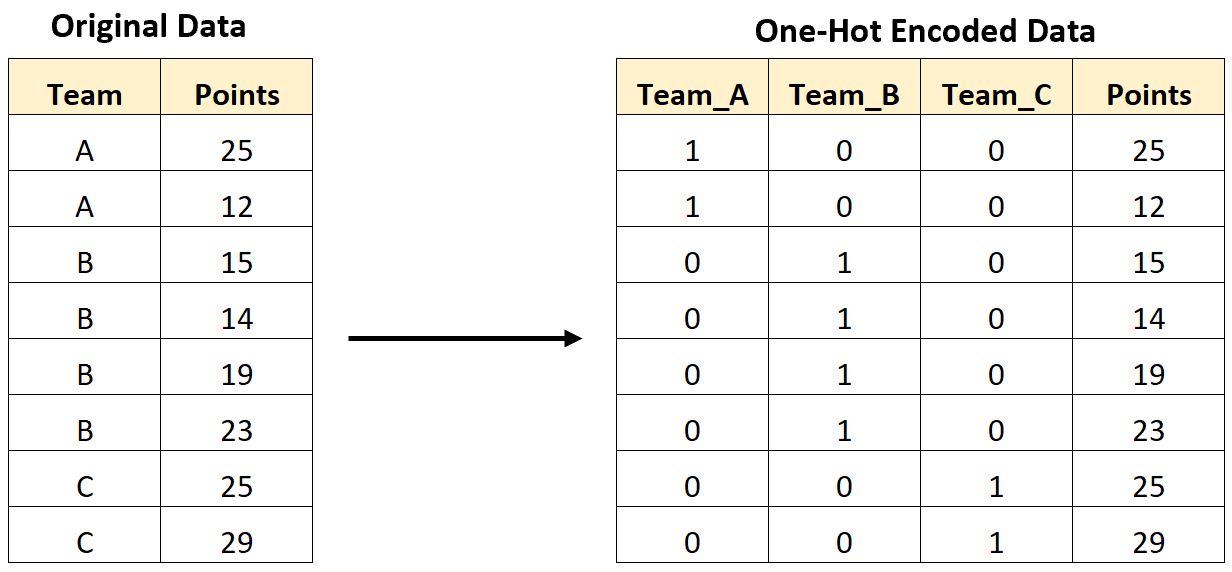

In [68]:
dataset_1.head(10)

,gender,age,annual_income,spending_score,gender_1
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
6,Female,22,17,76,0
7,Female,35,18,6,0
8,Female,23,18,94,0
9,Male,64,19,3,1


In [69]:
# Создание входной переменной, iloc срез
X = dataset_1.iloc[:, [1, 2, 3, 4]].values
X

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   0],
       [ 64,  19,   3,   1],
       [ 30,  19,  72,   0],
       [ 67,  19,  14,   1],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   0],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   0],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   1],
       [ 35,  23,  98,   0],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   0],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   0],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   0],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   0],
       [ 60,  30,   4,   1],
       [ 21,  30,  73,   0],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   1],
       [ 49,  

In [70]:
# Уменьшение размерности входных данных с помощью PCA
reduced_data = PCA(n_components=2).fit_transform(X)
reduced_data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878331e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

## Обучение и оценка качества модели

In [93]:
# Создаем экземпляр модели KMeans с определенными параметрами
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=5)

# Обучаем модель на входных данных X (со снижением размерности)
kmeans.fit(reduced_data)

KMeans(n_clusters=5, n_init=5)

In [94]:
# Предполагаем, что y_pred_plus.labels_ - это предсказания модели KMeans
# нужно будет определить эту переменную соответствующим образом
y_pred_labels = kmeans.labels_

In [95]:
# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred_plus = kmeans.fit(X)

In [96]:
np.unique(y_pred_plus.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [97]:
# посмотрим на целевую переменную с помощью точечной диаграммы

# Создаем график
fig = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color=y_pred_labels,
                 labels={'color': 'Цвет'}, title='Результат кластеризации')

# Устанавливаем размер фигуры
fig.update_layout(width=1000, height=600)

# Показываем график
fig.show()

In [101]:
# Создаем экземпляр модели KMeans с определенными параметрами
kmeans_not_reduces = KMeans(init="k-means++", n_clusters=5, n_init=5)

# Обучаем модель на входных данных X (со снижением размерности)
kmeans_not_reduces.fit(X)

KMeans(n_clusters=5, n_init=5)

In [103]:
# Предполагаем, что y_pred_labels_not_reduces.labels_ - это предсказания модели KMeans
# нужно будет определить эту переменную соответствующим образом
y_pred_labels_not_reduces = kmeans_not_reduces.labels_

In [104]:
# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred_plus_not_reduces = kmeans_not_reduces.fit(X)

In [106]:
y_pred_labels_not_reduces

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [107]:
np.unique(kmeans_not_reduces.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [108]:
# посмотрим на целевую переменную с помощью точечной диаграммы (данные без снижения размерности)

# Создаем график
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y_pred_labels_not_reduces,
                 labels={'color': 'Цвет'}, title='Результат кластеризации')

# Устанавливаем размер фигуры
fig.update_layout(width=1000, height=600)

# Показываем график
fig.show()

Таким образом посмотрели, что снижение размерности нужно для текущей задачи (альтернатива - поискать срез, где видны явные кластеры)

## Подбор числа кластеров

Посмотрим оптимальное ли число кластеров мы выбрали

In [98]:
# Используем метод локтя для определения оптимального числа кластеров
max_k = 11  # Максимальное число кластеров для оценки
wcss = []  # Список для хранения суммарных квадратов расстояний до ближайшего центра кластера (WCSS)

# Проходим по всем возможным числам кластеров от 1 до max_k
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(reduced_data)
    # Метод inertia возвращает WCSS для текущей модели
    wcss.append(kmeans.inertia_)

print(f'WCSS для текущей модели: {max_k}')
print(wcss)


WCSS для текущей модели: 11
[275534.6584569132, 181555.52598360332, 111540.69605479407, 74664.86612311543, 45092.051713733614, 37876.15160246058, 31221.02828829197, 26054.946739777617, 22500.431576224568, 20793.985105372252]


In [99]:
# Создаем фигуру с заданными размерами
fig = go.Figure()

# Добавляем линейный график с данными о WCSS по количеству кластеров
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines', name='WCSS'))

# Настройка заголовков и осей
fig.update_layout(
    title='Выбор количества кластеров методом локтя',
    xaxis_title='Количество кластеров',
    yaxis_title='WCSS'
)

# Отображаем график
fig.show()

For n_clusters = 2 The average silhouette_score is : 0.3424931686350321
For n_clusters = 3 The average silhouette_score is : 0.45105330843631863
For n_clusters = 4 The average silhouette_score is : 0.49666554997066514
For n_clusters = 5 The average silhouette_score is : 0.5526264331833406
For n_clusters = 6 The average silhouette_score is : 0.536430902836419
For n_clusters = 7 The average silhouette_score is : 0.5212199458305052
For n_clusters = 8 The average silhouette_score is : 0.44678925442084244
For n_clusters = 9 The average silhouette_score is : 0.4538492017638697
For n_clusters = 10 The average silhouette_score is : 0.4432403796092956


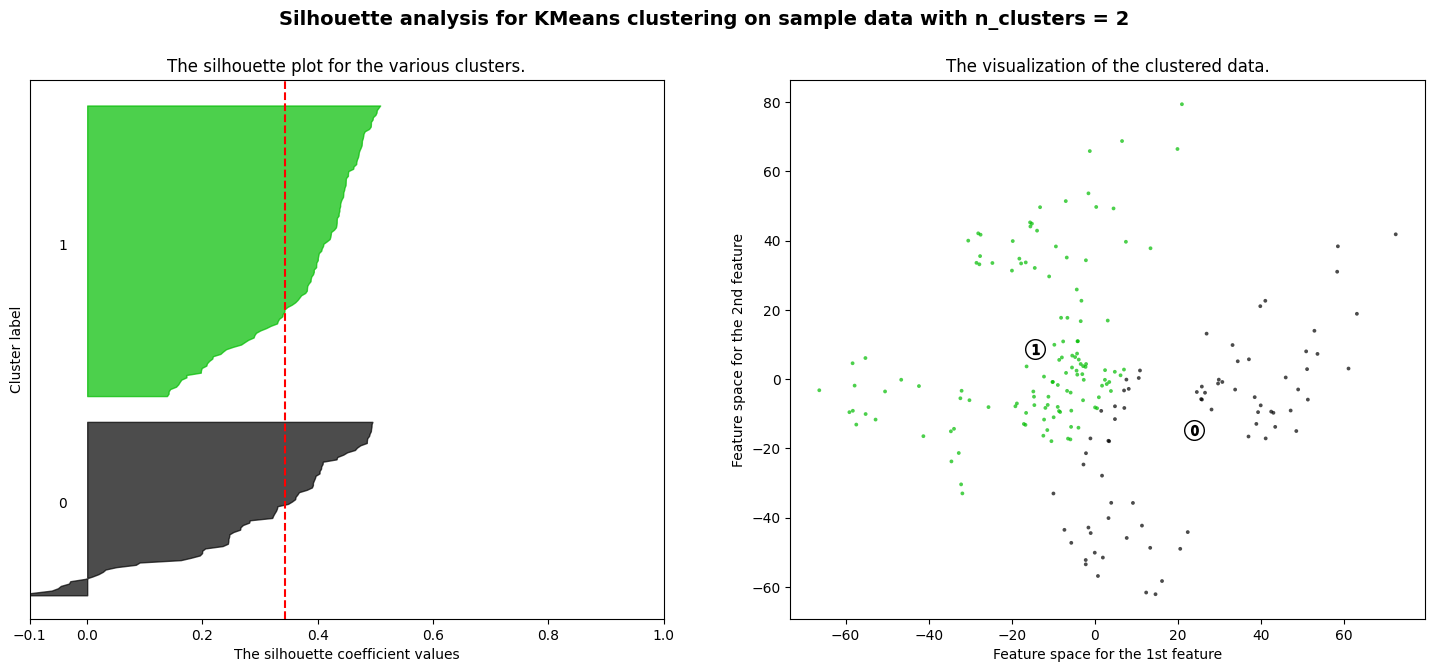

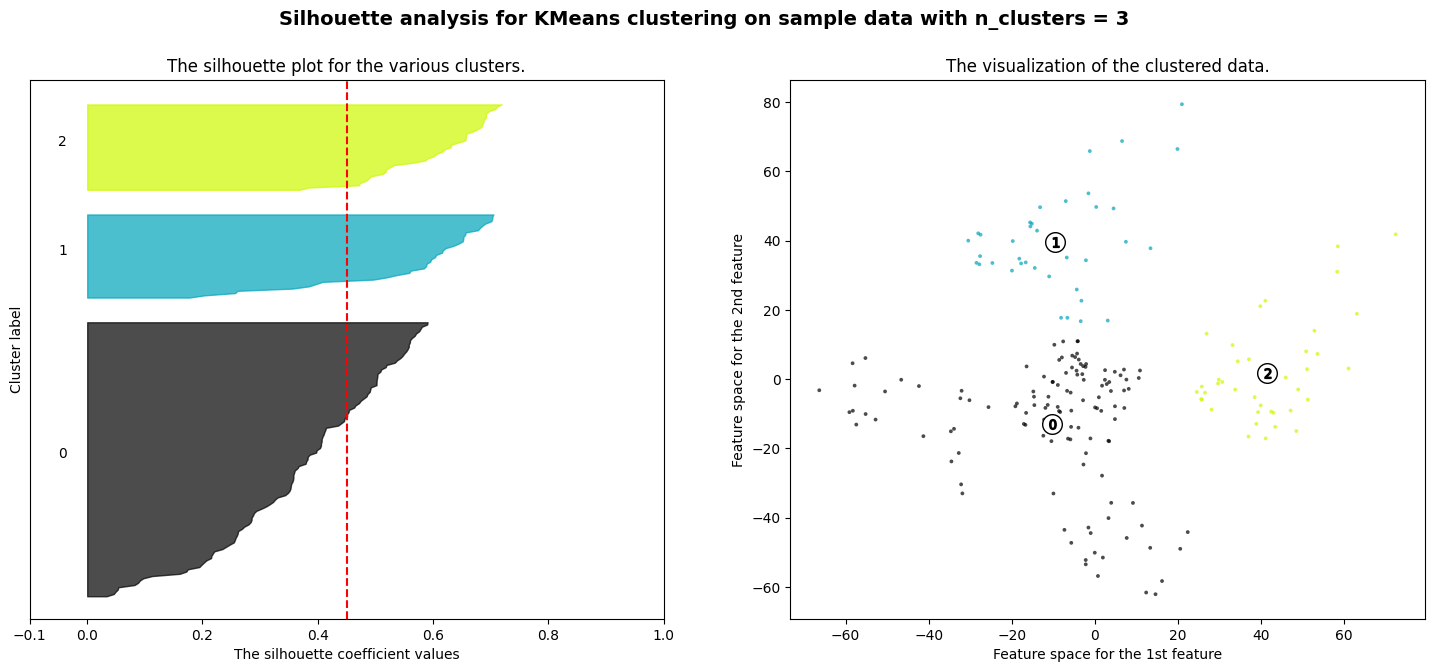

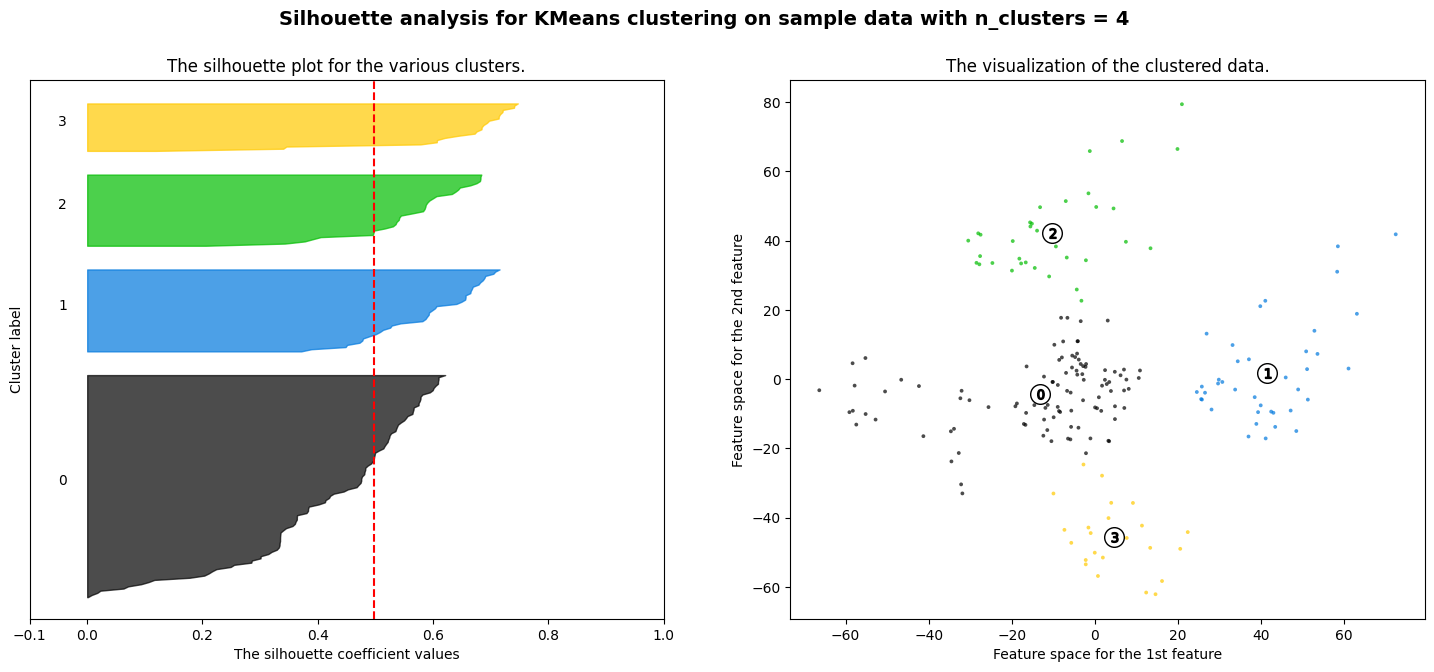

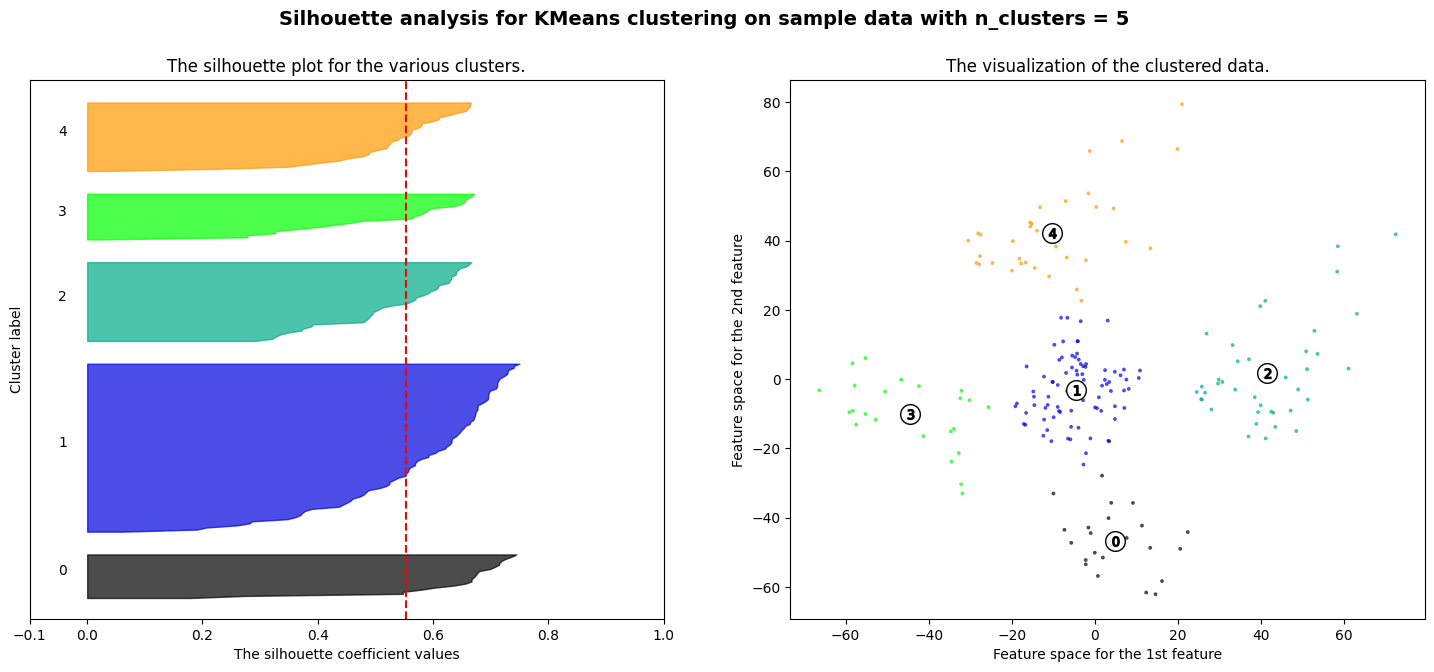

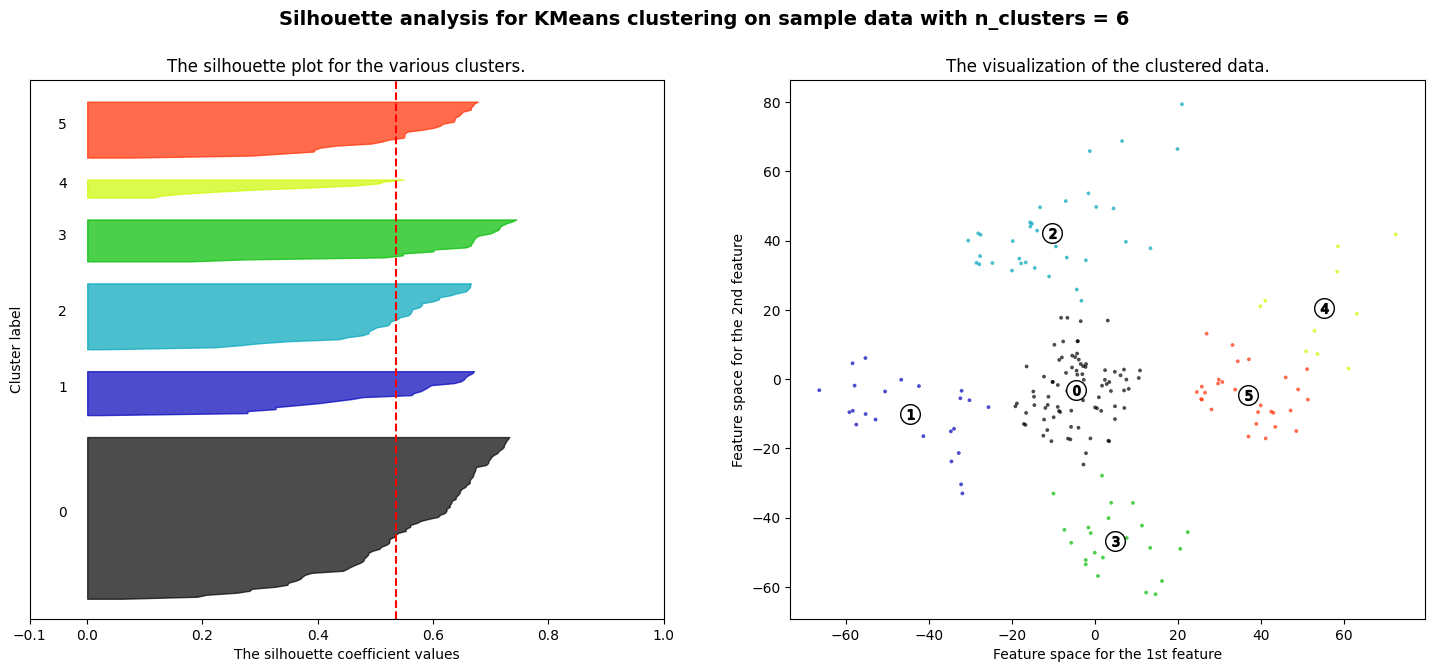

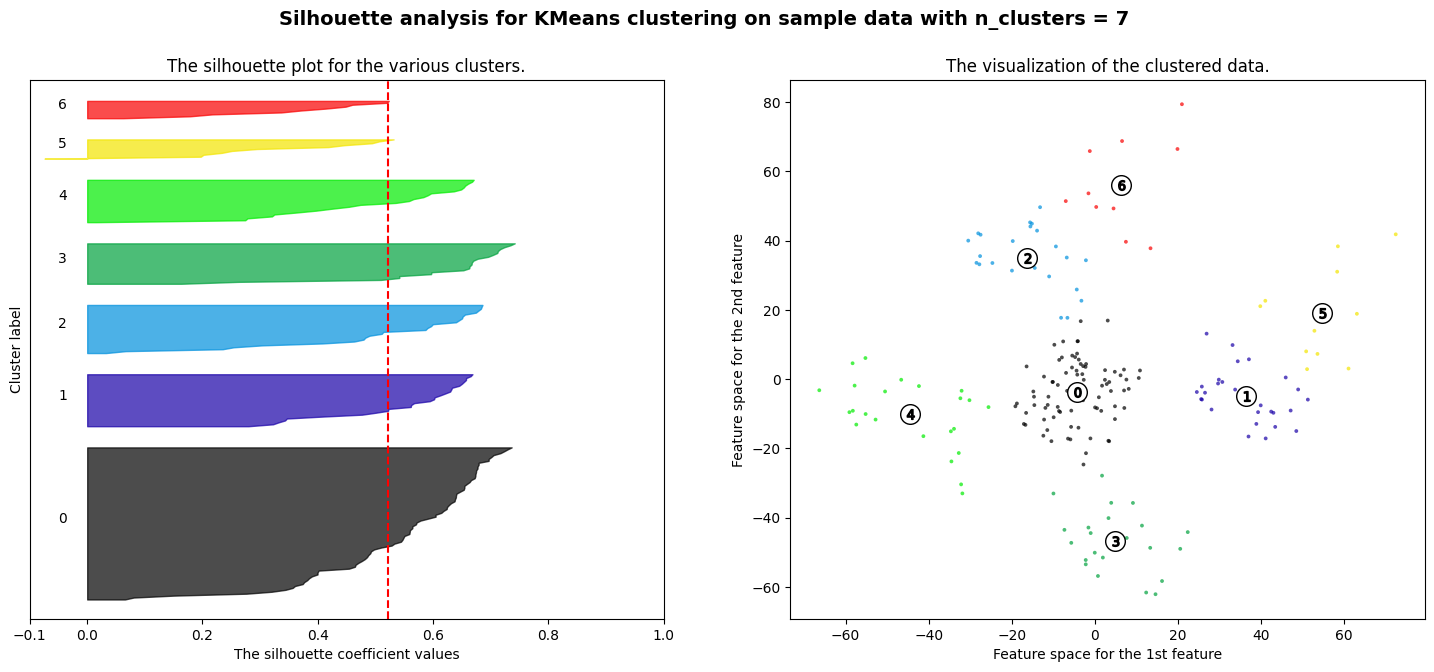

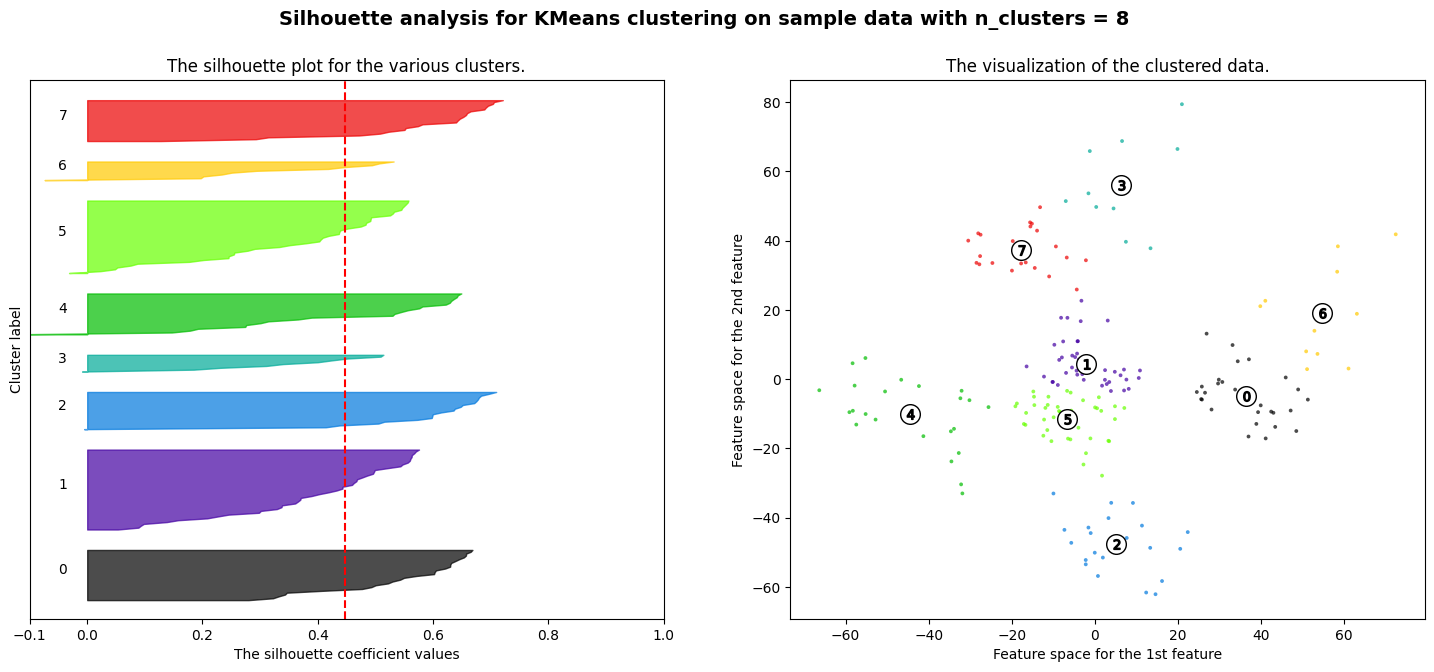

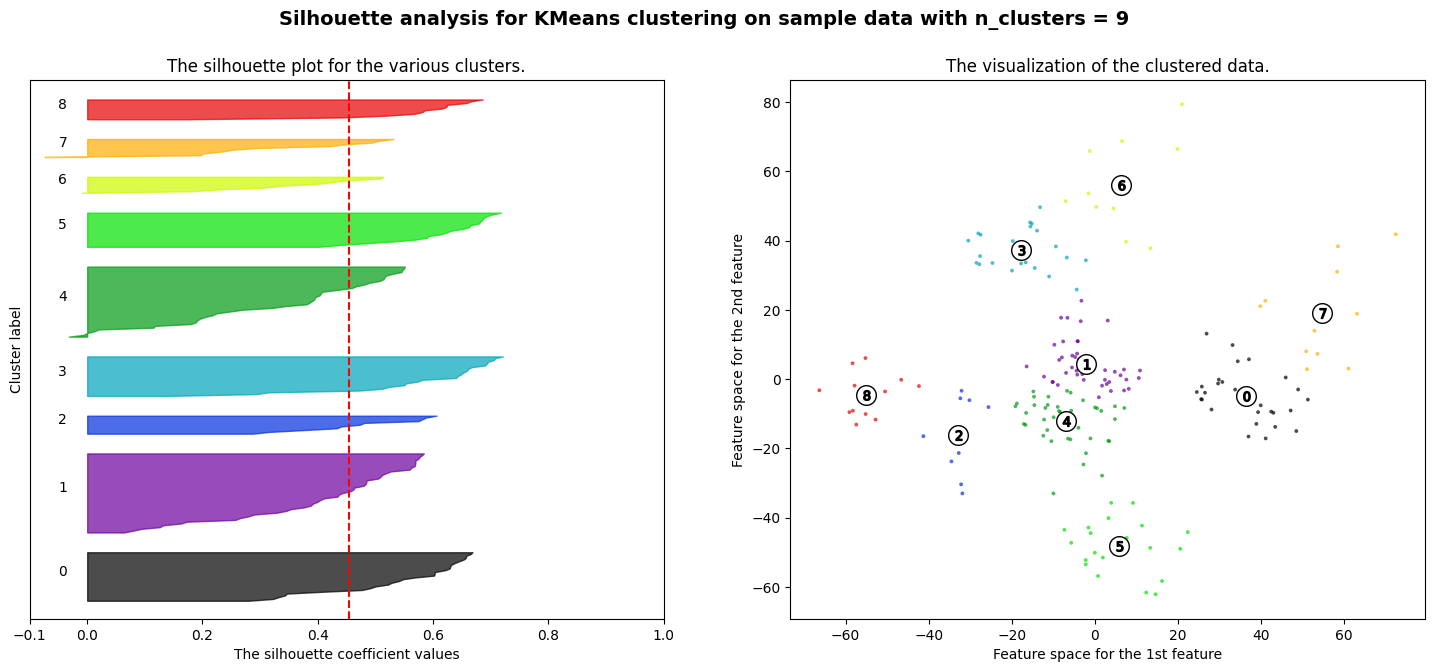

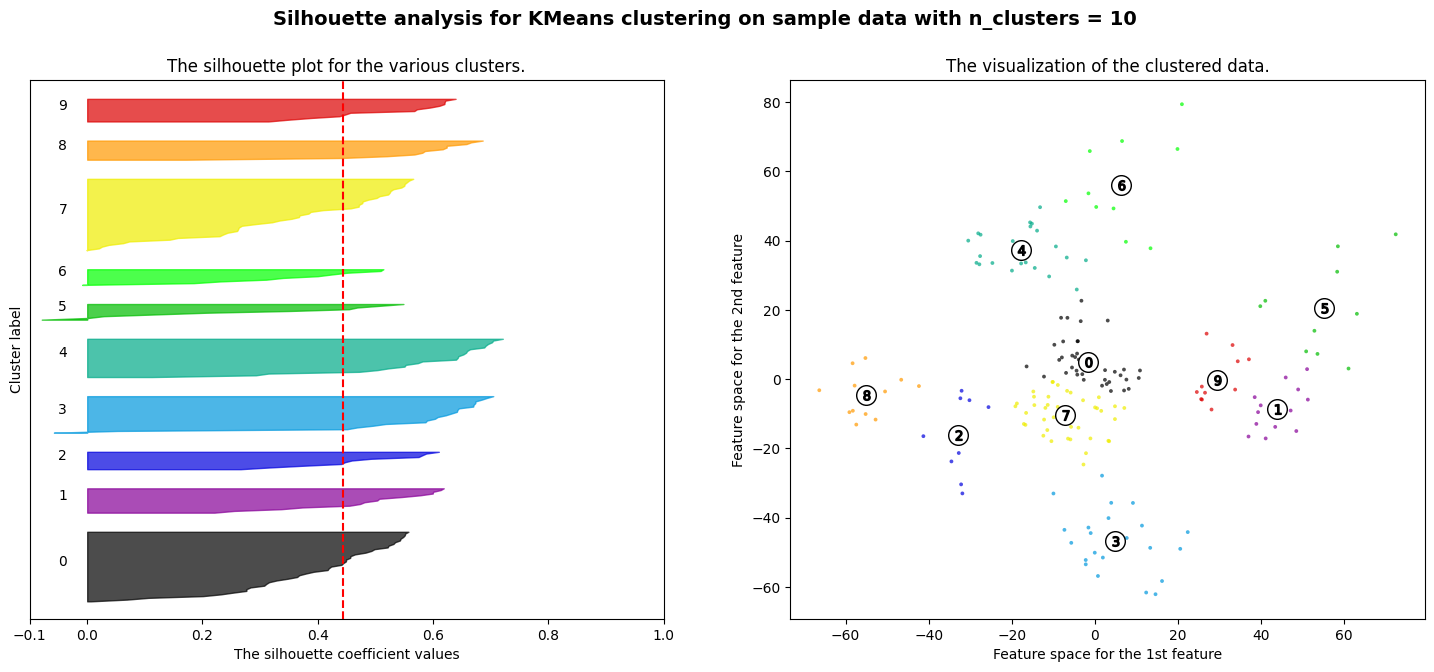

In [100]:
# Создадим пустой список для записи коэффициентов силуэта для каждого образца
sample_silhouette_values = []

# Воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 2 до max_k
min_range = 2
max_range = max_k  # до максимального, не включая

for i in range(min_range, max_range):
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Первый подсюжет — это график силуэта
    # Коэффициент силуэта может варьироваться от -1 до 1, но в этом примере все
    # лежат в пределах [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 предназначен для вставки пустого пространства между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(reduced_data) + (i + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и генератором случайных чисел
    # начальное число из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении образовавшихся
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print(
        "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg,
    )

    # Вычисляем оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Объединить оценки силуэтов для образцов, принадлежащих
        # кластер j и отсортируйте их
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Пометьте графики силуэтов номерами их кластеров посередине.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Вычисляем новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистите метки/галочки Yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактически сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for k, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



Выбор количества кластеров с помощью анализа силуэта на кластеризации KMeans
Анализ силуэта может быть использован для изучения расстояния разделения между полученными кластерами. График силуэта отображает меру того, насколько близко каждый пункт в одном кластере находится к пунктам в соседних кластерах и таким образом предоставляет способ визуальной оценки параметров, таких как количество кластеров. Эта мера имеет диапазон от [-1, 1].

Значения коэффициента силуэта около +1 указывают на то, что образец далеко от соседних кластеров. Значение 0 указывает на то, что образец находится на или очень близко к границе решения между двумя соседними кластерами, а отрицательные значения указывают на то, что эти образцы могли быть неправильно присвоены кластеру.
